<a href="https://colab.research.google.com/github/anshshah23/Python-Project-Sem-iii/blob/main/PythonProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      

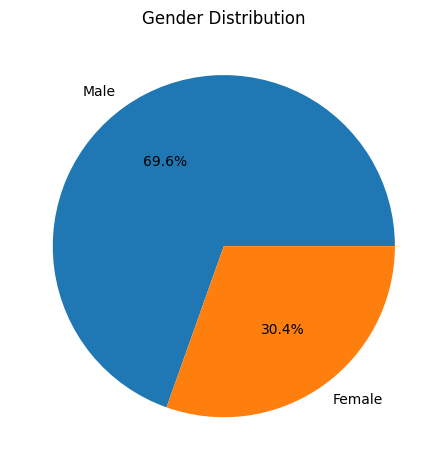

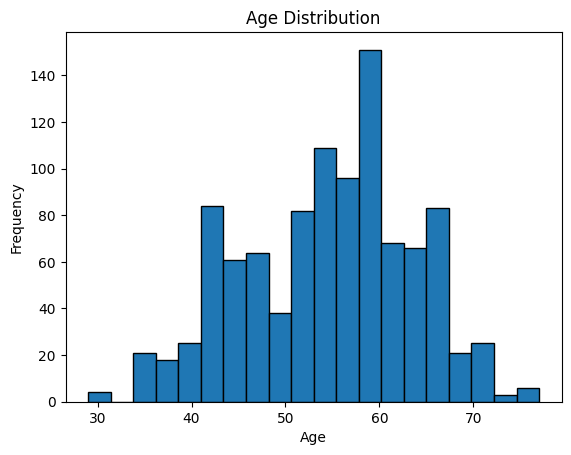

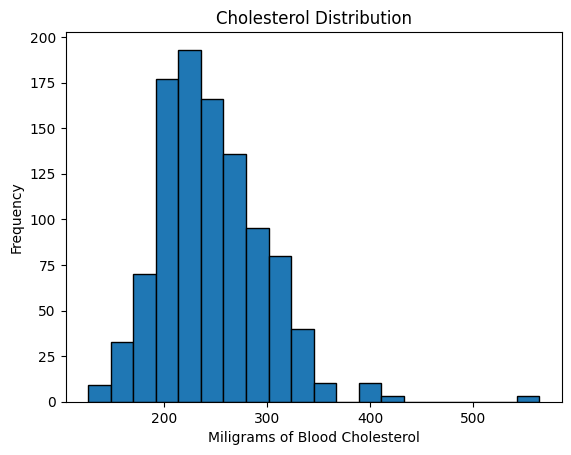

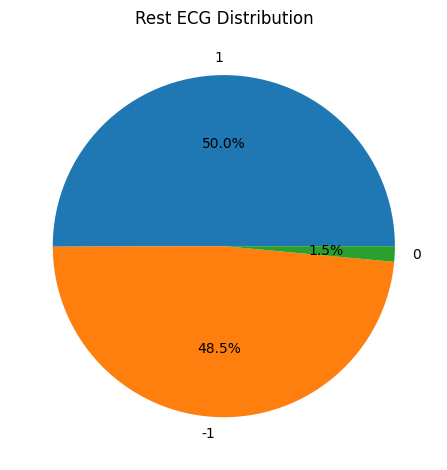

Model Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [7]:
df = pd.read_csv('/heart.csv')

df.columns = [col.strip() for col in df.columns]

print(df.info())

print("Missing values:\n", df.isnull().sum())


target_counts = df['target'].value_counts()
print("Target variable distribution:\n", target_counts)

numeric_summary = df.describe()
print("Numerical features summary:\n", numeric_summary)

gender_counts = df['sex'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%')
ax.set_title('Gender Distribution')
plt.tight_layout()
plt.show()

plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

plt.hist(df['chol'], bins=20, edgecolor='black')
plt.xlabel("Miligrams of Blood Cholesterol")
plt.ylabel("Frequency")
plt.title("Cholesterol Distribution")
plt.show()


restecg_counts = df['restecg'].value_counts()
fig, ax = plt.subplots()
ax.pie(restecg_counts, labels=['1', '-1', '0'], autopct='%1.1f%%')
ax.set_title('Rest ECG Distribution')
plt.tight_layout()
plt.show()



X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)